# Data Wrangling 

In [112]:
%matplotlib inline

# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [113]:
# Determine current working directory

import os

currentPath = os.getcwd()
currentPath

'/Users/Younes/Desktop/ML_testing/Final_Project'

In [114]:
# Load file (Red wine)

df_wine_r = pd.read_csv("winequality-red.csv")
df_wine_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
# Clean data

df_wine_r = df_wine_r.dropna()
df_wine_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [116]:
# Data type

df_wine_r.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [117]:
# Columns

df_wine_r.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [118]:
# Shape

df_wine_r.shape

(1599, 12)

In [119]:
# dimension datset

df_wine_r.ndim

2

In [120]:
# number of unique values in each column

df_wine_r.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [121]:
df_wine_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Exploration 

In [122]:
# Determine x and y variable

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol'] 

x = df_wine_r[features]
y = df_wine_r.quality

In [123]:
# Shape

print("Shape: ", x.shape, y.shape)

Shape:  (1599, 11) (1599,)


In [124]:
# Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [125]:
# Create a model and fit it

Model = LinearRegression()
Model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Determine R-square for test data

r_sq = Model.score(x_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.32071124343219315


In [127]:
# Determine R-square for train data

r_sq = Model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.37096437294057627


In [128]:
# Intercept 

print('intercept:', Model.intercept_)

intercept: 21.01105008827881


In [129]:
# Slope 

print('slope:', Model.coef_)

slope: [ 2.02362546e-02 -1.21385635e+00 -9.84560496e-02  2.21024824e-02
 -1.89761853e+00  1.99433159e-03 -3.00386885e-03 -1.67249074e+01
 -3.97705407e-01  8.54179475e-01  2.67506351e-01]


In [130]:
# Make prediction

y_pred = Model.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[5.77698343 5.04186238 6.58812977 5.38449676 5.94235649 5.05262894
 5.41458193 6.01438796 4.84612312 4.96358462 5.34037719 5.45310236
 5.74762487 5.04609467 5.5298785  6.37077951 6.81048257 5.80786582
 5.94225643 5.10463618 6.30480803 5.20797767 5.63891192 6.14447946
 5.5130062  5.01701749 5.19879799 6.49572365 5.34885245 6.2195562
 6.09065844 5.8570942  5.54513074 5.28600391 5.70464326 6.2153627
 5.16300514 5.46547134 6.36024605 5.78842262 5.45247612 6.05034673
 6.65558681 6.58819242 6.01087011 4.79026321 5.52926762 6.01442528
 5.50581887 6.1094846  5.3645023  5.3569158  5.78100776 6.36560789
 5.74243611 5.23301561 5.08378558 5.33390739 6.50763077 5.46055241
 5.15491058 5.77792925 6.05806639 6.29836916 5.07172948 6.1147426
 5.36980622 6.02148855 6.14452363 6.04562478 5.31885448 5.49214109
 5.06785305 5.58701634 5.63591451 6.20777786 5.4056327  5.33936313
 5.71978747 6.31306633 5.73600069 5.28587334 5.92859781 6.12134569
 5.50454085 5.37865176 6.2095893  5.09862828 

In [136]:
# Actual vs Predicted

df_diff_pred = df_pred.copy()

df_diff = (df_pred["Actual"] - df_pred["Predicted"])
df_diff_pred["diff"] = df_diff
df_diff_pred

,Actual,Predicted,diff
1109,6,5.776983,0.223017
1032,5,5.041862,-0.041862
1002,7,6.588130,0.411870
487,6,5.384497,0.615503
979,5,5.942356,-0.942356
...,...,...,...
801,5,5.503117,-0.503117
61,5,4.952331,0.047669
431,5,5.184073,-0.184073
1210,6,5.565374,0.434626


In [133]:
# Mean Squared Error

plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
r2 = Model.score(x_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.400780366375006, R2: 0.32071124343219315


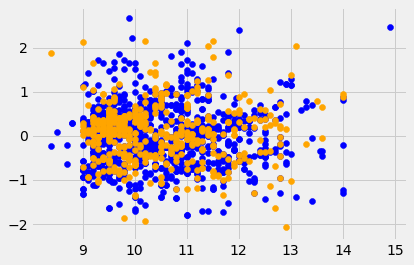

In [134]:
# Plotting alcohol vs quality

y_train_df = pd.DataFrame(x_train)
y_train_df['alcohol']

y_test_df = pd.DataFrame(x_test)
y_test_df['alcohol']

plt.scatter(y_train_df['alcohol'], Model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(y_test_df['alcohol'], Model.predict(x_test) - y_test, c="orange", label="Testing Data")

In [135]:
# Add column

Outcome = '1'
df_wine_r["Outcome"] = Outcome
df_wine_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Outcome
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [77]:
# Save dataframe to csv.

df_wine_r.to_csv('/Users/Younes/Desktop/ML_testing/Final_Project/df_final_r.csv', index=False)